<a href="https://colab.research.google.com/github/vinarp/UTS-PDS-Vina-Rahma-Putri/blob/main/UTS_3KA18_Vina_Rahma_Putri_16119503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Description: This program predicts the price of GOOG stock for a   
               #specific day 
#              using the Machine Learning algorithm called Support 
               #Vector Regression (SVR) 
#              

Memberikan deskripsi di komentar tentang apa yang akan dilakukan kode tersebut. Dengan cara ini saya dapat melihat kembali kode saya dan tahu persis apa fungsinya.

In [51]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-darkgrid')

Sekarang impor paket / libraries untuk memudahkan penulisan program.

In [52]:
#Load the data
#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('GOOG (3).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,2913.000000,2936.409912,2912.290039,2916.840088,2916.840088,791200
1,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
2,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
3,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300
5,2021-09-09,2897.669922,2913.389893,2888.679932,2898.270020,2898.270020,739900
6,2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1644800
7,2021-09-13,2864.020020,2883.820068,2845.649902,2869.300049,2869.300049,1008800
8,2021-09-14,2883.219971,2894.550049,2858.110107,2868.120117,2868.120117,945800
9,2021-09-15,2875.179932,2911.629883,2845.120117,2904.120117,2904.120117,1032400


saya akan memuat data frame saham Google (GOOG) yang saya dapatkan dari finance.yahoo.com.
Ini adalah data dari Yahoo selama 30 hari terakhir, 5–1–2019 hingga 5–30–2019.

In [53]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
19,2021-09-29,2742.194092,2747.969971,2685.0,2690.419922,2690.419922,1316900


cetak baris data terakhir. Harga Penutupan Penyesuaian adalah 2690.419922

In [54]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,2913.000000,2936.409912,2912.290039,2916.840088,2916.840088,791200
1,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
2,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
3,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300
5,2021-09-09,2897.669922,2913.389893,2888.679932,2898.270020,2898.270020,739900
6,2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1644800
7,2021-09-13,2864.020020,2883.820068,2845.649902,2869.300049,2869.300049,1008800
8,2021-09-14,2883.219971,2894.550049,2858.110107,2868.120117,2868.120117,945800
9,2021-09-15,2875.179932,2911.629883,2845.120117,2904.120117,2904.120117,1032400


Siapkan data. Buat kembali data frame dengan mendapatkan semua data kecuali baris terakhir yang akan saya gunakan untuk menguji model nanti, dan simpan data baru dengan baris terakhir ke 'df'

In [55]:
#Create the lists / X and y data set
days = list()
adj_close_prices = list()

Buat variabel yang akan digunakan sebagai kumpulan data independen dan dependen dengan menyetelnya sama dengan daftar kosong.

In [56]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

Dapatkan semua baris dari kolom Tanggal simpan ke dalam variabel yang disebut 'df_days' dan dapatkan semua baris dari kolom Adj Close dan simpan datanya ke dalam variabel.

In [57]:
#Create the independent data set
for day in df_days:
   days.append([int(str((day.split('-')[2]).replace('0','')))])

#Create the dependent data set
for adj_close_price in df_adj_close:
   adj_close_prices.append( float(adj_close_price) )

Buat kumpulan data independen 'X' dan simpan data dalam variabel 'hari'.

In [58]:
print(days)

[[1], [2], [3], [7], [8], [9], [1], [13], [14], [15], [16], [17], [2], [21], [22], [23], [24], [27], [28]]


lihat hari apa yang dicatat dalam kumpulan data.

In [59]:
#Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

selanjutnya, saya akan membuat 3 different Support Vector Regression (SVR) yang berbeda dengan tiga kernel yang berbeda untuk melihat mana yang berkinerja terbaik.

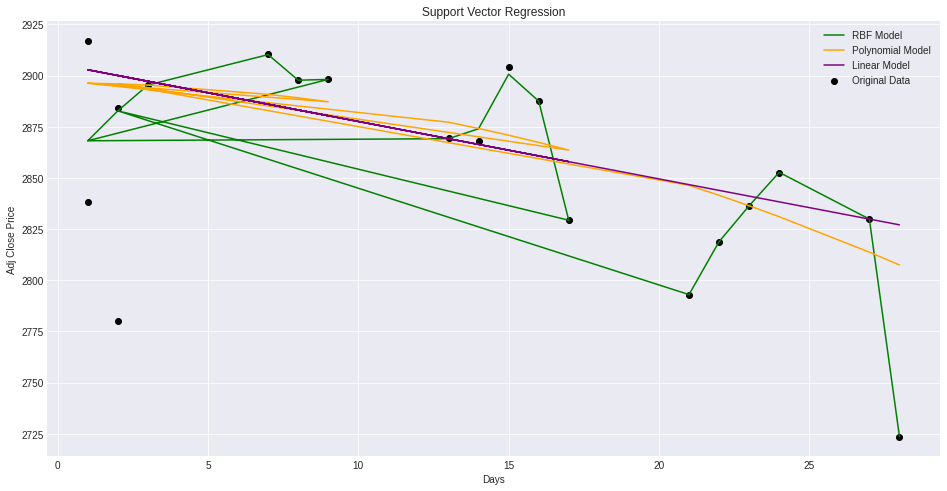

In [60]:
#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Saya akan memplot model pada grafik untuk melihat mana yang paling cocok dan mengembalikan prediksi hari itu.

Model terbaik dari grafik di bawah ini tampaknya adalah RBF yang merupakan model Regresi Vektor Pendukung yang menggunakan kernel yang disebut fungsi basis radial. Namun grafik ini bisa menyesatkan

Grafik yang diharapkan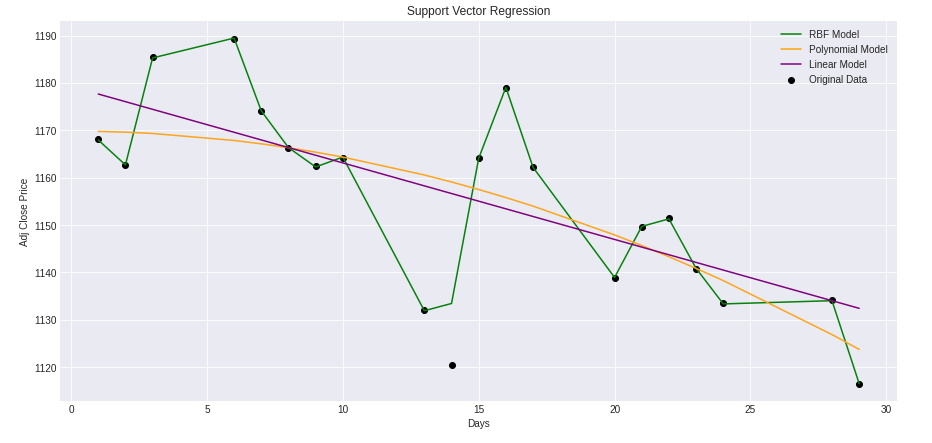

Saya bisa mulai membuat prediksi harga saham saya. Mengingat baris terakhir data yang tertinggal dari kumpulan data asli, tanggalnya adalah 05–30–2019, jadi harinya adalah 29.

In [61]:
day = [[30]]
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [2692.62407997]
The Linear SVR predicted: [2821.50287093]
The Polynomial SVR predicted: [2794.36362954]


data pada tanggal 29 September 2021 ini akan menjadi masukkan dari model untuk memprediksi harga aktual nya pada tanggal 29 September 2021 sebelumnya yaitu USD DOLLAR 2692.62407997 

In [62]:
from datetime import datetime
tgl = '2021-05-03'
print(str(datetime.strptime(tgl, '%Y-%m-%d').strftime('%Y-%-#m-%-#d')).split('-')[2] ,end='\n')

#t = datetime(2012, 2, 23, 0, 0)
#t.strftime('%-#m/%d/%Y')
tiga = '03'
print(int(tiga))

3
3


In [63]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])
df
print(df.loc['cobra'])

max_speed    1
shield       2
Name: cobra, dtype: int64
